## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [221]:
# importing libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [222]:
# Read the dataset from a csv file
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [223]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [224]:
df.user_id.nunique()

290584

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


d. The proportion of users converted.

In [229]:
df_converted = df.query('converted == 1')
df_converted.shape[0]

35237

In [231]:
# Finding the proportion of users converted
prop_converted = df_converted.user_id.nunique() / df.user_id.nunique()
prop_converted

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [232]:
# checking the unique values present in column 'group'
df.group.unique()

array(['control', 'treatment'], dtype=object)

In [234]:
# number of times the new_page and treatment don't line up 
(df[(df['group'] == "treatment") & (df['landing_page'] == "old_page")].shape[0]) + (df[(df['group'] == "control") & (df['landing_page'] == "new_page")].shape[0])

3893

In [235]:
# Another optimal way to find the number of times the new_page and treatment don't line up
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**No missing values present in any rows**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [236]:
df2 = df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [237]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [238]:
df2.shape[0]

290585

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [239]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [90]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [241]:
df2[df2['user_id'].isin(df2['user_id'][df2['user_id'].duplicated()])]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [242]:
df2[df2['user_id'] == 773192] 

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [243]:
df2.drop_duplicates('user_id',inplace = True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [244]:
(df2['converted'] == 1).mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [245]:
(df2[(df2['group'] == "control") & (df2['converted'] == 1)].shape[0]) / (df2[df2['group'] == "control"].shape[0])

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [246]:
(df2[(df2['group'] == "treatment") & (df2['converted'] == 1)].shape[0]) / (df2[df2['group'] == "treatment"].shape[0])

0.11880806551510564

d. What is the probability that an individual received the new page?

In [247]:
(df2['landing_page'] == "new_page").mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

For null hypothesis, we can state that there is no effect of the new changes made in page i.e. conversion rate of old page users is better than new one or may be the same, whereas for our alternative hypothesis we state that the conversion rate of new page users is better than those of the old page users.

**$H_{0}$:** **$p_{new}$ - $p_{old}$ <= 0**

**$H_{1}$:** **$p_{new}$ - $p_{old}$ > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [99]:
(df2['converted'] == 1).mean()

0.11959708724499628

In [100]:
df2.shape[0]

290584

a. What is the **convert rate** for $p_{new}$ under the null? 

In [138]:
p_new = (df2['converted'] == 1).mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [139]:
p_old = (df2['converted'] == 1).mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [140]:
n_new = df2[df2['group'] == "treatment"].shape[0]
n_new

145310

d. What is $n_{old}$?

In [141]:
n_old = df2[df2['group'] == "control"].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [135]:
new_page_converted = np.random.choice([0,1], n_new, p = [(1-p_new), p_new])
new_page_converted.mean()

0.12021884247470924

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [137]:
old_page_converted = np.random.choice([0,1], n_old, p = [(1-p_old), p_old])
old_page_converted.mean()

0.12091633740380248

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [121]:
p_new2 = (new_page_converted == 1).mean()
p_old2 = (old_page_converted == 1).mean()

p_new2 - p_old2

8.718818069415601e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [251]:
# 10,000 simulated mean values of each n_new sample sizes
new_page_converted_mean = np.random.binomial(n_new, p_new, 10000)/n_new
# 10,000 simulated mean values of each n_old sample sizes
old_page_converted_mean = np.random.binomial(n_old, p_old, 10000)/n_old
# 10,000 simulated p_diff values
p_diffs = new_page_converted_mean - old_page_converted_mean

In [253]:
# storing the 10000 p_diffs in a numpy array
p_diffs = np.array(p_diffs)
p_diffs.size

10000

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

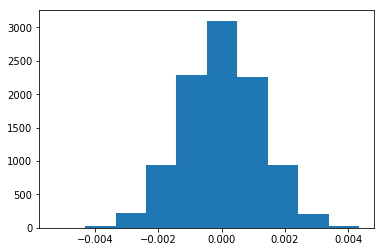

In [254]:
plt.hist(p_diffs);

Since the conversion rate for user landing to new_page and those landing to old_page was the same we would expect **p_diff** to be centered around 0. Hence the histogram depicts the same results as we expected.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [255]:
org_p_new = (df2[(df2['landing_page'] == "new_page") & (df2['converted'] == 1)].shape[0]) / (df2[df2['landing_page'] == "new_page"].shape[0])
org_p_old = (df2[(df2['landing_page'] == "old_page") & (df2['converted'] == 1)].shape[0]) / (df2[df2['landing_page'] == "old_page"].shape[0])
org_p_diff = org_p_new - org_p_old
org_p_diff

-0.0015782389853555567

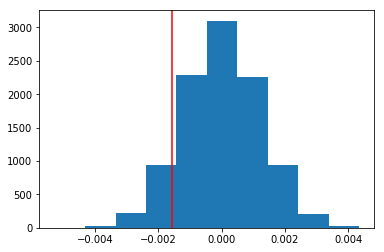

In [256]:
plt.hist(p_diffs);
plt.axvline(x=org_p_diff, color='red');

In [257]:
(p_diffs > org_p_diff).mean()

0.9045

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part j. we computed the p-value of our hypothesis testing. The p_value is that the probability of obtaining the observed statistic value and one or more extreme values in favour of the alternative given that the null hypothesis is true. 

Since the p_value we got is very high (0.9026) which is more than the significant threshold of 0.05, it suggests that **we fail to reject our null hypothesis which is $p_{new}$ - $p_{old}$ <= 0**. Hence it means that there is no significant difference between the new and old pages, and by plotting the sampling distribution of the difference between new and old pages and the actual difference in our sample data we can say that the difference lies on the negative side hence suggesting that old pages lead to slightly more conversions rather than the new pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [258]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1')['user_id'].count()
convert_new = df2.query('landing_page == "new_page" and converted == 1')['user_id'].count()
n_old = df2.query('landing_page == "old_page"')['user_id'].count()
n_new = df2.query('landing_page == "new_page"')['user_id'].count()

In [259]:
print(convert_old, convert_new)
print(n_old, n_new)

17489 17264
145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [260]:
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old], [n_new,n_old], alternative='larger')
(z_score, p_value)

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The above z-score of -1.3109 tells us that the observed statistic is 1.3109 standard deviations below the mean. 
Since the p_value we got is very high (0.905), it suggests that **we fail to reject our null hypothesis which is $p_{new}$ - $p_{old}$ <= 0**.

Hence they both suggest that the conversion rates of users landing on new pages are not better than of those landing in old pages.

The z_score and p_value obtained using the in-built function aligns with our findings previously using sampling distribution where we failed to reject the null hypothesis. Both indicates that the observed sample statistic lies below the sampling mean and since the p_value in both cases is 0.9, we fail to reject the null hypothesis.  

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since we need to predict that a page would lead to a coversion or no conversion, i.e. a binary outcome, **Logistic regression** is best suited for this case.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [190]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [261]:
# creating a new dataframe and ading a new column to it 'ab_page'
df_log = df2.copy()
df_log['ab_page'] = np.where(df2['group'] == "treatment",1,0)
df_log.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


In [262]:
# Adding the intercept column to df_log
df_log['intercept'] = 1

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [263]:
import statsmodels.api as sm
reg_mod = sm.Logit(df_log['converted'],df_log[['intercept','ab_page']])
result = reg_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [264]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        01:50:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [265]:
1/np.exp(-0.0150)

1.015113064615719

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

The p-value associated with ab_page using Logistic Regression model is 0.190 which indicates that our explanatory variable is not significant enough in predicting our dependent variable.

In the Logistic regression model we were interested in finding that the conversion of any user is dependent on which page the user is landing on (similar to which group the user belongs to) or not. Hence our null hypothesis was that our explanatory variable, i.e., **ab_page** does not have any statistical significance/relation in predicting our dependent variable, i.e., **converted**. In other words the coefficient of ab_page is 0. The alternative hypothesis states that our explanatory variable has statistical significance/relationship to our predicting/dependent variable which means the coefficient of ab_page is not equal to 0. This was a two-tailed test.

But in Part II we were interested in finding that is the new page better than the old page in terms of the conversion rate of the users. Hence our null hypothesis was that the **conversion rate of new page users** was not better than the **conversion rate of old page users** and the alternative hypothesis stated the opposite which is that the conversion rate of new page users is better than the old page users. This was a one-tailed test.

The above two are the reasons that why the p-values from Part II and Part III differ.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is a good idea to consider other factors to add into our regression model because in the above summary it was observed that only using ab_page as an explanatory variable is not enough to predict conversion or no conversion as the p-value suggested that ab_page was not significant enough to predict the conversion alone. Hence other factors which are not present in the given data such as the age group of the user or the region/country to which the user belongs to may also have a significant effect in determining the conversion of a user.

This is to be noted that even with additional factors we can never account for all influencing factors or accomodate them. We should also be careful while adding additional terms into our regression model as it may lead to **multicollinearity**. If explanatory variables are highly correlated with one another (known as multicollinearity), then the effect of each on the regression model becomes less precise. This is one of the disadvantages of adding additional terms into our regression model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [268]:
# Creating a new dataframe by joining the country dataframe to dataframe df2 
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [269]:
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [270]:
# Unique values in country column
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [271]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
# Dropping one of the dummies to make the matrix full rank
df_new.drop('UK',axis=1,inplace=True)

In [272]:
df_new.head()

,country,timestamp,group,landing_page,converted,CA,US
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,0


In [273]:
df_new['intercept'] = 1
log_mod2 = sm.Logit(df_new['converted'], df_new[['intercept','CA','US']])
result = log_mod2.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 May 2019   Pseudo R-squ.:               1.521e-05
Time:                        01:53:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

From the above summary we can observe the p-value to be 0.074 and 0.456 for explanatory variables 'CA' and 'US' respectively. It states that even the countries didn't have much significant impact on conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [274]:
# Adding the ab_page column to df_new
df_new['ab_page'] = (df_new.group == "treatment").astype(int)
df_new['CA_page'] = df_new['CA'] * df_new['ab_page']
df_new['US_page'] = df_new['US'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,CA,US,intercept,ab_page,CA_page,US_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,0,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,0,1,1,0,0


In [275]:
### Fit Your Linear Model And Obtain the Results
log_mod3 = sm.Logit(df_new['converted'], df_new[['intercept','CA','US','ab_page','CA_page','US_page']])
result = log_mod3.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 30 May 2019   Pseudo R-squ.:               3.482e-05
Time:                        01:53:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
US             0.0057      0.019      0.306      0.760      -0.031       0.043
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
CA_page       -0.0783      0.057     -1.378      0.168      -0.190       0.033
US_page       -0.0314      0.027     -1.181      0.238      -0.084       0.021
==============================================================================
"""

None of the variables above have significant p-values, i.e., p-values less than 0.05. Hence, we can state that non of the explanatory variables are significant enough to determine the conversion. So we fail to reject the null hypothesis and conclude that there is not sufficient evidence to suggest that there is an interaction between country and page received that will predict whether a user converts or not.

<a id='conclusions'></a>
## Conclusions

Overall after performing analysis using various different ways, we can conclude that based on the available information we do not have sufficient evidence to suggest that the new page results in more conversions than the old page. Infact the numbers suggest that the older page performs slightly better than the new page. Hence we fail to reject our null hypothesis in both the hypothesis testing using sampling distribution and also in our logis regression model.